In [4]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from daio.h5 import lazyh5
import os, pathlib, glob

cmap = "gray"

In [2]:
# pn_rec = r"Y:/hpc/r/lfm2025/recordings"
pn_rec = r"~/hpc-r/lfm2025/recordings"
includes = ['']
excludes = []

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_rec, '*'))), reverse=True) if os.path.exists(os.path.join(pn_rec, rec, 'data.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250602_1753_LB_bg_200s
20250602_1749_LB_bg_100s
20250602_1635_LB_200um_lines
20250602_1630_LB_500um_lines
20250602_1629_LB_400um_lines
20250514_1648_LB_ZF552_f5_5_comp_40fps_16bit
20250514_1643_FB_ZF552_f5_4_uncomp_40fps_noap
20250514_1639_FB_ZF552_f5_3_comp_80fps_noap
20250514_1635_LF_ZF552_f4_1_comp_40fps
20250514_1632_LF_ZF552_f4_1_uncomp_80fps
20250514_1605_LF_ZF552_f3_2_comp_40fps
20250514_1602_LF_ZF552_f3_1_uncomp_80fps
20250514_1548_LF_ZF552_f2_2_comp_40fps
20250514_1546_LF_ZF552_f2_1_uncomp_80fps
20250514_1522_LF_ZF552_f1_6_uncomp_40fps_noap
20250514_1520_LF_ZF552_f1_5_uncomp_80fps_noap
20250514_1515_LF_ZF552_f1_4_uncomp_40fps
20250514_1513_LF_ZF552_f1_3_uncomp_80fps
20250514_1511_LF_ZF552_f1_2_comp_40fps
20250514_1508_LF_ZF552_f1_1_comp
20250513_1518_LB_ZF5pf_552_f1_3
20250513_1515_LB_ZF5pf_552_f1_2
20250513_1513_LB_ZF5pf_552_f1_1
20250513_1351_LB_redFB_1-1k_3d_with_movement
20250512_1954_LB_redFB_1-1k_3d_with movement_80fps
20250512_1951_LB_redFB_1-1k_3d_with movement
20250

In [16]:
dataset_name = "20250602_1749_LB_bg_100s"
url_home = "/home/lubo12/"
pn_out = "~/hpc-rw/lfm/bg"



In [17]:
bg = lazyh5(os.path.join(str(pathlib.Path(pn_rec, dataset_name).expanduser()), 'data.h5'))

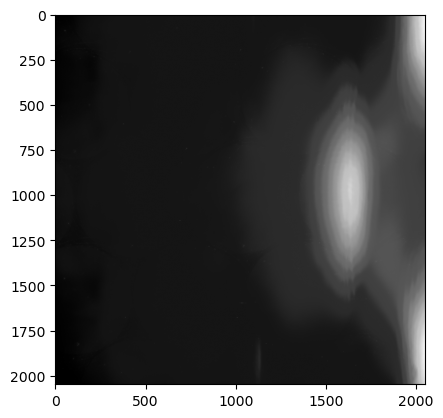

In [18]:
bg_mean = cp.asarray(bg["data"]).mean(axis=0, dtype = cp.float64).get()
plt.imshow(bg_mean, cmap = "gray")

In [19]:
np.save(os.path.expanduser(os.path.join(pn_out,dataset_name))+".npy",bg_mean)